<a href="https://colab.research.google.com/github/cuongle2002/AI-/blob/main/AI_WEEK_9(31_3_2023_CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CIFARR 10 



In [ ]:
from keras.datasets import cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
 y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

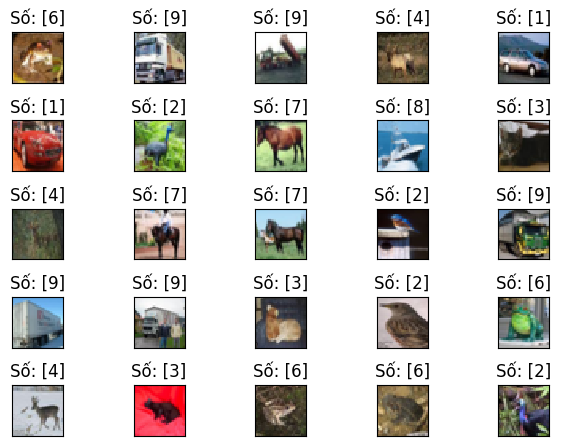

In [ ]:
import matplotlib.pyplot as plt 
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = "gray", interpolation = "none")
  plt.title("Số: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense 
model = Sequential()
model.add(Dense(3000, activation = "relu", input_shape = (32*32*3,))) 
model.add(Dense(1000, activation = "relu", ))
model.add(Dense(500, activation = "relu", )) # 512 row non, hamf truyen: relu, input = 28x28 
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_5 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dense_7 (Dense)             (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = x_test   # luu du lieu
Y = y_test    # luu du lieu


In [ ]:
x_train = x_train.reshape(50000, 32*32*3)    # tuwf 60000 hangf thanh 1 hang, 28*28 thanh 1 cot, du lieu cua train
x_train = x_train.astype('float32')/255   # chuyen thanh kieu thuc tu 0 den 1
x_test = x_test.reshape(10000,32*32*3)       # du lieu cua test
x_test = x_test.astype('float32')/255

x_train.shape

(50000, 3072)

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
from keras.utils import to_categorical        # categorical chuyen 1 bit thanh n bits 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [ ]:
y_train.shape

(50000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Mat mat: ", test_loss)
print("Do chinh xac: ", test_acc)

Epoch 1/10
391/391 [==============================] - 3s 6ms/step - loss: 1.0910 - accuracy: 0.6145
Epoch 2/10
391/391 [==============================] - 2s 6ms/step - loss: 1.0500 - accuracy: 0.6268
Epoch 3/10
391/391 [==============================] - 2s 6ms/step - loss: 1.0313 - accuracy: 0.6357
Epoch 4/10
391/391 [==============================] - 2s 6ms/step - loss: 1.0142 - accuracy: 0.6433
Epoch 5/10
391/391 [==============================] - 2s 6ms/step - loss: 0.9931 - accuracy: 0.6489
Epoch 6/10
391/391 [==============================] - 2s 6ms/step - loss: 0.9706 - accuracy: 0.6597
Epoch 7/10
391/391 [==============================] - 2s 6ms/step - loss: 0.9482 - accuracy: 0.6643
Epoch 8/10
391/391 [==============================] - 2s 6ms/step - loss: 0.9266 - accuracy: 0.6766
Epoch 9/10
391/391 [==============================] - 2s 6ms/step - loss: 0.9073 - accuracy: 0.6822
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 2.2553 - accuracy: 0.4869

In [ ]:
model.save("test1.h5")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 0s 95ms/step


array([7])

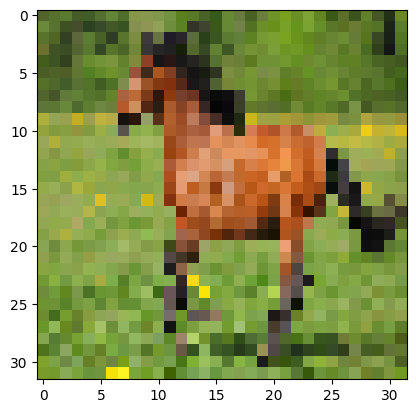

In [ ]:
import matplotlib.pyplot as plt 
from keras.utils.image_utils import img_to_array
from keras.models import Sequential, load_model
from keras.utils import load_img
import numpy as np 


img = load_img('/content/Beautiful-horse-running-in-a-grassy-field.jpg',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/test1.h5')
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 172ms/step


array([5])

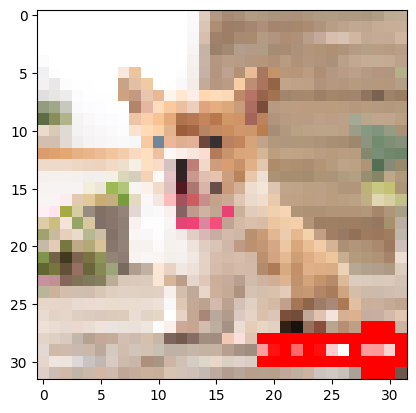

In [ ]:
img = load_img('/content/con-cho-tieng-nhat-la-gi (1).png',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/test1.h5')
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 67ms/step


array([4])

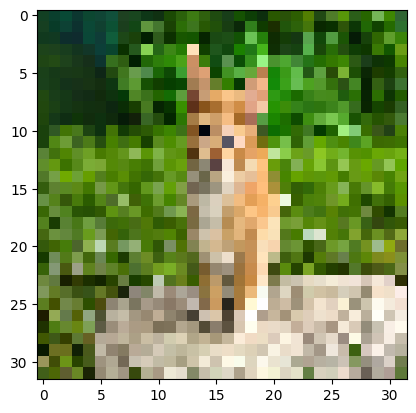

In [ ]:
img = load_img('/content/cach-noi-con-meo-trong-tieng-han.jpg',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/test1.h5')
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 97ms/step


array([6])

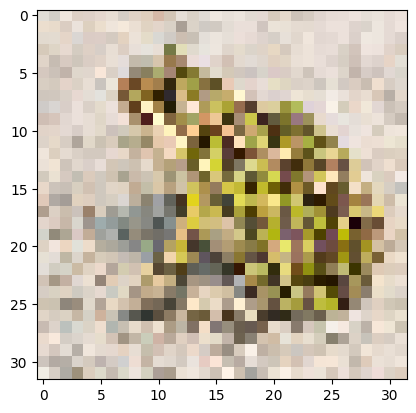

In [ ]:
img = load_img('/content/tải xuống.jpg',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/test1.h5')
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 103ms/step


array([2])

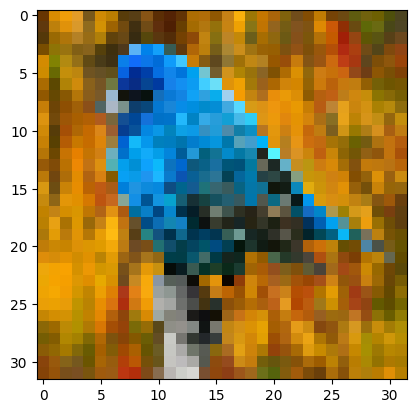

In [ ]:
img = load_img('/content/72b924221817a68b5ae7afef89671f0c.jpg',target_size = (32,32,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
model = load_model('/content/test1.h5')
np.argmax(model.predict(img), axis = -1)